# Proyecto 1
<h3>Natalia Ortega (sección 4), David Leon (sección 3) & Juan Camilo Mercado (sección 4)</h3>

## 0. Carga de librerías y datos

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sklearn
import numpy as np
import nltk
import random
import statistics
import string
import unicodedata

from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.probability import *
from nltk.tokenize import word_tokenize

from scipy import stats as st

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from gensim.models import Word2Vec

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn import tree


se descargan los módulos específicos de la librería nltk para poder procesar le texto de la mejor forma posible:

In [183]:
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CAMILO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CAMILO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CAMILO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [184]:
df = pd.read_csv('./data/tipo2_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')

## 1. Entendimiento y preparación de datos

### Entendimiento

Con los datos de los actores de turismo leyendo el conjunto de datos correspondiente de reseñas de sitios turísticos, se procede a entender la estructura de los comentarios que estos nos presentan.

In [185]:
print(f">> Se puede observar que el df de entrenamiento contiene {df.shape[0]} reseñas")

>> Se puede observar que el df de entrenamiento contiene 7875 reseñas


Se observan que solo existen 2 columnas, una con la s¿reseña y otra con la calificación corrrespondiente, donde se identifica que no hay datos faltantes ni atípicos respecto al tipo de dato, pues la columna numérica peranece numérica.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


In [187]:
print(">> El df se ve de la siguiente forma:")
df.head()

>> El df se ve de la siguiente forma:


,Review,Class
0,"Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable. Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas. Buena comida de parte del restaurante,variedad en comidas",5
1,"Buen hotel si están obligados a estar cerca del centro de convenciones, pero el restaurante necesita mejorar! Frío y café flojo - y - un montón de pan de personas que sirve unos uderstanding de bu lo que significa un servicio. En este barrio con tan pocas opciones - debería ser un hotel especial.",3
2,"Es un lugar muy lindo para fotografías, visiten Selina, música en vivo, cerveza artesanal y buena comida",5
3,Abusados con la factura de alimentos siempre se echan la culpa unos a otros van y buscan el rfc que les proporcionaste por que independisan la base que ya tienen registrada en alimentos con la base del check in y ya pasaron 3 dias y aun nadade mi factura aunque hables de larga distancia y queden formalmente fe enviartela en un momento no es asi mañana otra vez voy a tener que hablar y para colmo ni el ticket me dieron.,3
4,"Tuvimos un par de personas en el grupo que realmente queríamos comer cabrito, el resto de nosotros eran buenas con probarla. Servicio empezó realmente bien, hasta que llegamos a situar nuestros pedidos. Cuando le preguntamos acerca de cómo agregar o sustituir elementos el camarero casi...parecía molestarle y claro qué y cómo lo ve en el menú es la única opción. Aparte de eso, la comida y el ambiente donde genial!Más",3


Cada una de estas reseñas contiene una calificación de acuerdo al sentimiento que tuvo el turista al visitarlo, por lo que es importante ver las tendencias de calificaciones, y las tendencias de las reseñas.

Se observa que las reseñas varían en cantidad de palabras, donde hay palabras que se repiten y generan una moda, los cuales suelen ser palabras que no aportan valor al análisis (no son sustantivos, verbos o adjetivos). Se observa el uso de mayúsculas y minúsuculas para diferenciar entre diferentes tipos de palabras, per en este contexto no aporta al análisis.

In [188]:
textos = df.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Palabras únicas'] = [len(set(x)) for x in textos['Review']]
textos['Max. de palabra'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min. de palabra'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Moda'] = [statistics.mode(i.split(' ')) for i in textos['Review']]

textos

,Review,Class,Conteo,Palabras únicas,Max. de palabra,Min. de palabra,Moda
0,"Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable. Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas. Buena comida de parte del restaurante,variedad en comidas",5,252,28,20,0,
1,"Buen hotel si están obligados a estar cerca del centro de convenciones, pero el restaurante necesita mejorar! Frío y café flojo - y - un montón de pan de personas que sirve unos uderstanding de bu lo que significa un servicio. En este barrio con tan pocas opciones - debería ser un hotel especial.",3,297,34,13,1,de
2,"Es un lugar muy lindo para fotografías, visiten Selina, música en vivo, cerveza artesanal y buena comida",5,104,26,12,1,Es
3,Abusados con la factura de alimentos siempre se echan la culpa unos a otros van y buscan el rfc que les proporcionaste por que independisan la base que ya tienen registrada en alimentos con la base del check in y ya pasaron 3 dias y aun nadade mi factura aunque hables de larga distancia y queden formalmente fe enviartela en un momento no es asi mañana otra vez voy a tener que hablar y para colmo ni el ticket me dieron.,3,422,28,14,1,y
4,"Tuvimos un par de personas en el grupo que realmente queríamos comer cabrito, el resto de nosotros eran buenas con probarla. Servicio empezó realmente bien, hasta que llegamos a situar nuestros pedidos. Cuando le preguntamos acerca de cómo agregar o sustituir elementos el camarero casi...parecía molestarle y claro qué y cómo lo ve en el menú es la única opción. Aparte de eso, la comida y el ambiente donde genial!Más",3,419,35,14,1,el
...,...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte, ya que conecta con el metro, es incluyente para toda la población.",4,113,24,11,2,el
7871,"Fue una escapada de un día desde el complejo, fuimos con un grupo de turistas que habían guías muy informados. Una vez en una visita tipo de vida. Como han dicho otros, vendedores por todas partes un poco la experiencia, arruinar no tienen lugar en el interior.",4,261,31,12,2,de
7872,"La Plaza de la Revolución es un lugar emblemático que un poco que identifica a la Habana a partir de la segunda mitad del siglo XX, ya que es alli donde se han producido la mayoría los principales discursos de los lideres de la Revolución Cubana. Ademas esta rodeada de varios edificios majestuosos donde radican algunos de los Organismos de la Administración Central del Estado, asi como la sede del Consejo de Estado y de Ministros y el Comité Central del Partido Comunista de Cuba. Tambien ha hecho historia por ser el lugar donde los 3 Papas que han visitado a Cuba han realizado sus misas, y por los Megaconciertos que allí se han realizado tanto por artistas cubanos como extranjeros como es el caso del Concierto por la Paz que agrupó a mas de un millon de personas alli",3,777,43,14,1,de
7873,"Es la segunda ocasión que me quedo en los cuartos del area de Jardín, todo muy cómodo menos el internet. El internet no funciona en el area de alberca y cuartos del jardín. Lo reporte 3 veces y nunca lo arreglaron, tenia mucha necesidad de terminar cosas del trabajo y me tuve que ir a un Starbucks porque mi hotel 5 estrellas no tenia. Pedi cambio de cuarto al area de torres pero me dijeron que no tenían ni un cuarto mas y eso que me ofrecí a pagar la diferencia. La primera vez que me quede en este hotel el internet no funciono, pensé que era situación de un solo día y decidí darle otra oportunidad. No lo vuelvo hacer, he aprendido mi lección.",1,651,38,12,0,que


igualmente, se busca observar que las clases sean valores válidos y definidos (números enteros del 1 al 5). Además se busca observar su frecuencia para observar la cantidad de reseñas que tenemos como muestra de cada una de las clases correspondientes.

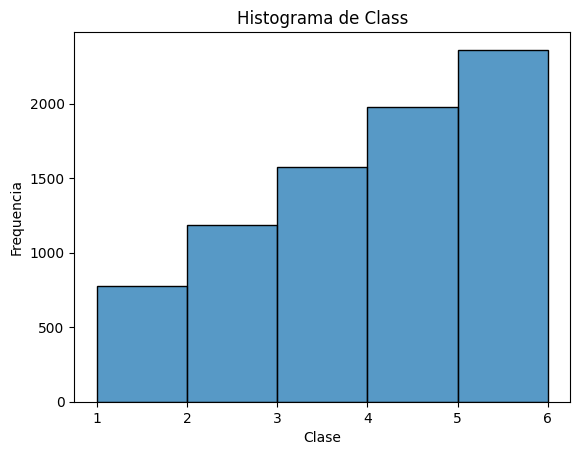

In [189]:
sns.histplot(data=textos, x='Class', bins=range(1, 7), kde=False)
plt.xlabel('Clase')
plt.ylabel('Frequencia')
plt.title('Histograma de Class')
plt.xticks(range(1, 7))
plt.show()

Se observa que hay mayor número de comentarios de clase 5, y va disminuyendo la cantidad con su categoría, por lo que se sabe que la mayor confiabilidad del entrenamiento se dará con la clase 5, así sucesivamente hasta la clase 1 que tendrá la menor confiabilidad al contar con la menor cantidad de datos para realizar el análisis.

Ahora bien, para darles significado, se muestran ejemplos de comentarios por clase para definir el significado de cada una.

In [190]:
pd.set_option('display.max_colwidth', None)

clases_muestra = df['Class'].unique()
comentarios_muestra = []
for clase in clases_muestra:
    comentario = df[df['Class'] == clase]['Review'].iloc[0]
    comentarios_muestra.append(comentario)
tabla_muestra = pd.DataFrame({'Clase': clases_muestra, 'Comentario': comentarios_muestra})
tabla_muestra.sort_values('Clase', inplace=True)

tabla_muestra


,Clase,Comentario
4,1,"Se equivocaron en la central de reservas y al llegar al hotel me cobraron más para poder alojarme Una habitación con 3 recamaras y me pusieron solo un huésped 🤦🏽‍♂️ No tienen sentido común, acabe pagando por las otras 5. O sea me engañaron 😡"
3,2,"Acabo de volver de Cuba. La primera semana en Tryp Habana libre y no puedo recomendar que a nadie. La primera imagen en el vestíbulo estaba bastante bien pero cuando salimos del ascensor en el piso, no pudimos evitar el olor a moho. Tras par de noche había una enorme fuga de agua en el baño y tuvimos que cambiar de habitación. La segunda habitación era tan fría que teníamos que llevar cordero grillada calcetines de lana y un suéter mientras duerme. Los recepcionistas eran todos antipático. El desayuno estaba bien, pero el piso 25 club nocturno terrible con banda ruidosa y mala. No bañados por ir a este hotel, que debe ser renovada completamente. Algo bueno? La vista ..."
1,3,"Buen hotel si están obligados a estar cerca del centro de convenciones, pero el restaurante necesita mejorar! Frío y café flojo - y - un montón de pan de personas que sirve unos uderstanding de bu lo que significa un servicio. En este barrio con tan pocas opciones - debería ser un hotel especial."
2,4,Un complejo enorme de fortificaciones frente al antiguo de La Habana. Visité en un día cuando el otro lado del castillo era trincadas con agua elevándose a 20 metros o más desde el mar.
0,5,"Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable. Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas. Buena comida de parte del restaurante,variedad en comidas"


Se observa que en este contexto los comentarios con clase 5 son aquellos de mayor positividad y gratitud, seguidos de la clase 4 que muestra positividad moderada pero notable. Los comentarios de clase 3 son aquellos que se muestran entre neutrales y buenos en su opinión,seguidos por la clase 2 que muestra tener comentarios negativos o levemente negativos, y finalmente, la clase 1 que muestra total desagrado con la experiencia.

Igualmente, se busca obtener las medidas de tendencia central para cada uno de los grupos de análisis de los comentarios, para observar el promedio de la longitud de los comentarios y las palabras únicas, qué tanto varían estas cantidades con la desviación estándar, cual es el máximo número de palabras únicas que existe y el mínimo. Esto será importante para observar cómo se puede comportar la lemantización futura de estas palabras.

In [191]:
textos.describe()

,Class,Conteo,Palabras únicas,Max. de palabra,Min. de palabra
count,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000
mean,3.502603,408.050413,33.117714,13.145778,0.858413
std,1.320435,474.145795,7.896652,2.930502,0.515585
min,1.000000,9.000000,9.000000,4.000000,0.000000
25%,3.000000,196.000000,28.000000,11.000000,1.000000
50%,4.000000,269.000000,31.000000,13.000000,1.000000
75%,5.000000,488.000000,37.000000,14.000000,1.000000
max,5.000000,10403.000000,80.000000,76.000000,5.000000


Asimismo, se busca obsrvar un ejemplo de un comentario para ver cómo se distribuyen sus palabras y su frecuencia, igualmente para observar la influencia d caracteres como espacios, comas, tíldes u otros caracteres que puedan entorpecer el entendimiento del comentario para el algoritmo.

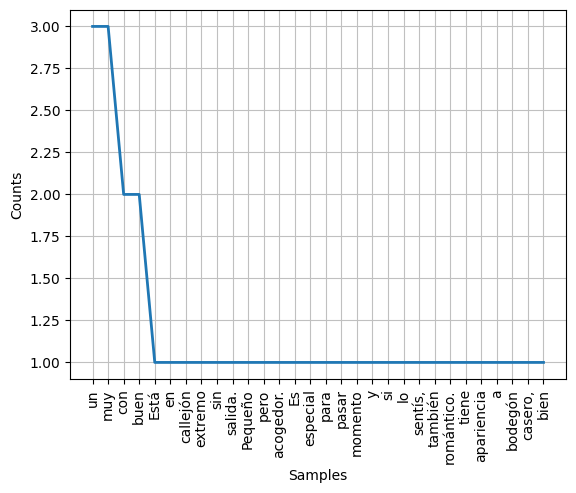

<Axes: xlabel='Samples', ylabel='Counts'>

In [192]:
fdist = FreqDist(df['Review'][random.randint(0, df.shape[0])].split(' '))
fdist.plot(30, cumulative = False)

Viendo que es evidente la influencia de los caracteres especiales en los comentarios se procede a hacer la limpieza de datos por lo que, como primer paso, se  hace la tokenización de los comentarios.

### Segmentación de palabras (tokenización)

La tokenización se realiza para convertir el texto en una forma que pueda ser procesada por algoritmos de ML. Al dividir el texto en tokens, se crea una representación estructurada que permite al algoritmo comprender y analizar el contenido del texto de manera más efectiva.

En este caso se hace tokenización basada en palabras. Este enfoque divide el texto en palabras individuales. Utiliza espacios en blanco y signos de puntuación como delimitadores para identificar las palabras.

In [193]:
token_df = df.copy()
token_df['Words'] = df['Review'].apply(word_tokenize)
token_df.head()

,Review,Class,Words
0,"Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable. Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas. Buena comida de parte del restaurante,variedad en comidas",5,"[Muy, buena, atención, y, aclaración, de, dudas, por, parte, de, la, señorita, Verónica, castillo, ,, atenta, y, amable, en, cuestión, laborable, ., Ideal, para, descansar, muy, buenas, habitaciónes, ,, limpieza, ,, ordenadas, ., Buena, comida, de, parte, del, restaurante, ,, variedad, en, comidas]"
1,"Buen hotel si están obligados a estar cerca del centro de convenciones, pero el restaurante necesita mejorar! Frío y café flojo - y - un montón de pan de personas que sirve unos uderstanding de bu lo que significa un servicio. En este barrio con tan pocas opciones - debería ser un hotel especial.",3,"[Buen, hotel, si, están, obligados, a, estar, cerca, del, centro, de, convenciones, ,, pero, el, restaurante, necesita, mejorar, !, Frío, y, café, flojo, -, y, -, un, montón, de, pan, de, personas, que, sirve, unos, uderstanding, de, bu, lo, que, significa, un, servicio, ., En, este, barrio, con, tan, pocas, opciones, -, debería, ser, un, hotel, especial, .]"
2,"Es un lugar muy lindo para fotografías, visiten Selina, música en vivo, cerveza artesanal y buena comida",5,"[Es, un, lugar, muy, lindo, para, fotografías, ,, visiten, Selina, ,, música, en, vivo, ,, cerveza, artesanal, y, buena, comida]"
3,Abusados con la factura de alimentos siempre se echan la culpa unos a otros van y buscan el rfc que les proporcionaste por que independisan la base que ya tienen registrada en alimentos con la base del check in y ya pasaron 3 dias y aun nadade mi factura aunque hables de larga distancia y queden formalmente fe enviartela en un momento no es asi mañana otra vez voy a tener que hablar y para colmo ni el ticket me dieron.,3,"[Abusados, con, la, factura, de, alimentos, siempre, se, echan, la, culpa, unos, a, otros, van, y, buscan, el, rfc, que, les, proporcionaste, por, que, independisan, la, base, que, ya, tienen, registrada, en, alimentos, con, la, base, del, check, in, y, ya, pasaron, 3, dias, y, aun, nadade, mi, factura, aunque, hables, de, larga, distancia, y, queden, formalmente, fe, enviartela, en, un, momento, no, es, asi, mañana, otra, vez, voy, a, tener, que, hablar, y, para, colmo, ni, el, ticket, me, dieron, .]"
4,"Tuvimos un par de personas en el grupo que realmente queríamos comer cabrito, el resto de nosotros eran buenas con probarla. Servicio empezó realmente bien, hasta que llegamos a situar nuestros pedidos. Cuando le preguntamos acerca de cómo agregar o sustituir elementos el camarero casi...parecía molestarle y claro qué y cómo lo ve en el menú es la única opción. Aparte de eso, la comida y el ambiente donde genial!Más",3,"[Tuvimos, un, par, de, personas, en, el, grupo, que, realmente, queríamos, comer, cabrito, ,, el, resto, de, nosotros, eran, buenas, con, probarla, ., Servicio, empezó, realmente, bien, ,, hasta, que, llegamos, a, situar, nuestros, pedidos, ., Cuando, le, preguntamos, acerca, de, cómo, agregar, o, sustituir, elementos, el, camarero, casi, ..., parecía, molestarle, y, claro, qué, y, cómo, lo, ve, en, el, menú, es, la, única, opción, ., Aparte, de, eso, ,, la, comida, y, el, ambiente, donde, genial, !, Más]"


### Limpieza de datos (StopWords) y análisis lexicográfico

Como se observa, existen tokens que entorpecen el entendimiento de las palabras, como lo son los denominados stopwprds, los cuales son palabras comunes que se consideran irrelevantes para el análisis de texto debido a su alta frecuencia de aparición en un lenguaje determinado. Estas palabras, como "el", "la", "y", "a", "de", entre otras, no aportan información significativa para el análisis de texto y suelen ser eliminadas o ignoradas en tareas de procesamiento de lenguaje natural, por esto se hace el tratamiento respectivo para eliminarlas de los tokens con la clase TextProcessor, cyos objetos serán capaces que preprocesar los datos, pues, hará conversión en minúsculas, removerá caracteres especiales y signos de puntuación y finalmente hará la extracción de los lemas de las palabras para que lo importante sea su significado y no su forma gramatical.


In [194]:
class TextProcessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('spanish'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = SnowballStemmer('spanish')
        self.punctuation = string.punctuation

    def to_lowercase(self, texto):
        return [word.lower() for word in texto]

    def remove_punctuation(self, texto):
        return [word for word in texto if word not in self.punctuation]

    def remove_stopwords(self, texto):
        return [word for word in texto if word not in self.stop_words]

    def lemmatize(self, texto):
        return [self.lemmatizer.lemmatize(word) for word in texto]

    def stem(self, texto):
        return [self.stemmer.stem(word) for word in texto]

    def remove_non_ascii(self, texto):
        return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in texto]

    def preprocess(self, texto):
        texto = self.to_lowercase(texto)
        texto = self.remove_punctuation(texto)
        texto = self.remove_stopwords(texto)
        texto = self.lemmatize(texto)
        texto = self.stem(texto)
        texto = self.remove_non_ascii(texto)
        return texto

Ahora se hará la conversión respectiva con un objeto de la clase construida:

In [195]:
processor = TextProcessor()
token_df['Stemmed words'] = [processor.preprocess(text) for text in token_df['Words']]
token_df.head()

,Review,Class,Words,Stemmed words
0,"Muy buena atención y aclaración de dudas por parte de la señorita Verónica castillo, atenta y amable en cuestión laborable. Ideal para descansar muy buenas habitaciónes, limpieza, ordenadas. Buena comida de parte del restaurante,variedad en comidas",5,"[Muy, buena, atención, y, aclaración, de, dudas, por, parte, de, la, señorita, Verónica, castillo, ,, atenta, y, amable, en, cuestión, laborable, ., Ideal, para, descansar, muy, buenas, habitaciónes, ,, limpieza, ,, ordenadas, ., Buena, comida, de, parte, del, restaurante, ,, variedad, en, comidas]","[buen, atencion, aclar, dud, part, senorit, veron, castill, atent, amabl, cuestion, labor, ideal, descans, buen, habitacion, limpiez, orden, buen, com, part, restaur, varied, com]"
1,"Buen hotel si están obligados a estar cerca del centro de convenciones, pero el restaurante necesita mejorar! Frío y café flojo - y - un montón de pan de personas que sirve unos uderstanding de bu lo que significa un servicio. En este barrio con tan pocas opciones - debería ser un hotel especial.",3,"[Buen, hotel, si, están, obligados, a, estar, cerca, del, centro, de, convenciones, ,, pero, el, restaurante, necesita, mejorar, !, Frío, y, café, flojo, -, y, -, un, montón, de, pan, de, personas, que, sirve, unos, uderstanding, de, bu, lo, que, significa, un, servicio, ., En, este, barrio, con, tan, pocas, opciones, -, debería, ser, un, hotel, especial, .]","[buen, hotel, si, oblig, cerc, centr, convencion, restaur, necesit, mejor, fri, caf, floj, monton, pan, person, sirv, uderstanding, bu, signif, servici, barri, tan, poc, opcion, deb, ser, hotel, especial]"
2,"Es un lugar muy lindo para fotografías, visiten Selina, música en vivo, cerveza artesanal y buena comida",5,"[Es, un, lugar, muy, lindo, para, fotografías, ,, visiten, Selina, ,, música, en, vivo, ,, cerveza, artesanal, y, buena, comida]","[lug, lind, fotograf, visit, selin, music, viv, cervez, artesanal, buen, com]"
3,Abusados con la factura de alimentos siempre se echan la culpa unos a otros van y buscan el rfc que les proporcionaste por que independisan la base que ya tienen registrada en alimentos con la base del check in y ya pasaron 3 dias y aun nadade mi factura aunque hables de larga distancia y queden formalmente fe enviartela en un momento no es asi mañana otra vez voy a tener que hablar y para colmo ni el ticket me dieron.,3,"[Abusados, con, la, factura, de, alimentos, siempre, se, echan, la, culpa, unos, a, otros, van, y, buscan, el, rfc, que, les, proporcionaste, por, que, independisan, la, base, que, ya, tienen, registrada, en, alimentos, con, la, base, del, check, in, y, ya, pasaron, 3, dias, y, aun, nadade, mi, factura, aunque, hables, de, larga, distancia, y, queden, formalmente, fe, enviartela, en, un, momento, no, es, asi, mañana, otra, vez, voy, a, tener, que, hablar, y, para, colmo, ni, el, ticket, me, dieron, .]","[abus, factur, aliment, siempr, echan, culp, van, busc, rfc, proporcion, independis, bas, registr, aliment, bas, check, in, pas, 3, dia, aun, nadad, factur, aunqu, habl, larg, distanci, qued, formal, fe, enviartel, moment, asi, manan, vez, voy, ten, habl, colm, ticket, dieron]"
4,"Tuvimos un par de personas en el grupo que realmente queríamos comer cabrito, el resto de nosotros eran buenas con probarla. Servicio empezó realmente bien, hasta que llegamos a situar nuestros pedidos. Cuando le preguntamos acerca de cómo agregar o sustituir elementos el camarero casi...parecía molestarle y claro qué y cómo lo ve en el menú es la única opción. Aparte de eso, la comida y el ambiente donde genial!Más",3,"[Tuvimos, un, par, de, personas, en, el, grupo, que, realmente, queríamos, comer, cabrito, ,, el, resto, de, nosotros, eran, buenas, con, probarla, ., Servicio, empezó, realmente, bien, ,, hasta, que, llegamos, a, situar, nuestros, pedidos, ., Cuando, le, preguntamos, acerca, de, cómo, agregar, o, sustituir, elementos, el, camarero, casi, ..., parecía, molestarle, y, claro, qué, y, cóm

Ahora podemos observae la conversión d elas palabras y la frecuencia de estas, lo que se muestra en el siguiente ejemplo donde se observan los lemas limpios de caracteres especviales, mayúsculas, puntuación, entre otros.

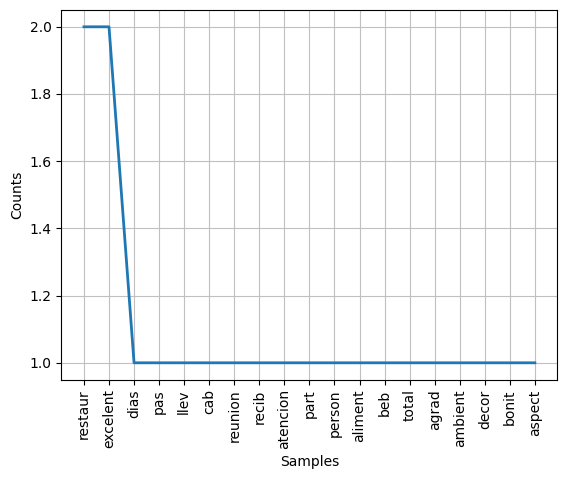

<Axes: xlabel='Samples', ylabel='Counts'>

In [196]:
fdist = FreqDist(token_df['Stemmed words'][random.randint(0, df.shape[0])])
fdist.plot(30, cumulative = False)

### Vectorización, modelado y evaluación

Como primer paso para el modelado, es necesario vectorizar las reseñas para que el computador pueda tener un correcto entendimiento de estas, por lo que un primer paso es juntar los lemas enlistados en oraciones representantes de sus respectivas reseñas. Igualmente, al juntar estas oraciones se hace la división de datos de entrenaiento y test. Los datos de entrenamiento se parten a su vez en modelado y validación.

In [197]:
token_df['Text'] = [' '.join(text) for text in token_df['Stemmed words']]


X = token_df['Text']
Y = token_df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=777)
X_modeling, X_validation, Y_modeling, Y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=777)

Ahora bien, para vectorizar se tendrán en cuenta 3 formas de vectorización, que, teniendo en cuenta las ventajas y desvantajas de cada una, se conoce que no hay un mejor vectorizador para todos los casos. La elección del vectorizador depende de la complejidad de las reseñas, por lo que se construye, primero, un vectorizador de forma 'word2vec' y posteriormente, se hace una funación que evalúe la calidad del resultado de modelado y validación para los vectorizadores 'word2vec', 'Count' y 'Tfidf', el cual retorna el mejor vectorizador observando los resultados obtenidos.

In [198]:
def word2vec(model):
    sentences = [text.split() for text in X_train]
    word2vec_vectorizer = Word2Vec(sentences, vector_size=3, window=2, min_count=1)
    X_list_train = []
    for text in sentences:
        vector = np.zeros(3) 
        for word in text:
            if word in word2vec_vectorizer.wv:
                vector += word2vec_vectorizer.wv[word]
        X_list_train.append(vector)
    X_temp_train = np.array(X_list_train)
    X_temp_modeling, X_temp_validation, Y_temp_modeling, Y_temp_validation = train_test_split(X_temp_train, Y_train, test_size=0.2, random_state=777)
    model.fit(X_temp_modeling, Y_temp_modeling)
    Y_temp_pred_validation = model.predict(X_temp_validation)
    score = f1_score(Y_temp_validation, Y_temp_pred_validation, average='micro')
    return word2vec_vectorizer, score, model


In [199]:
def best_vectorizer(model):
    best_vectorizer = None
    best_score = 0
    for vectorizer in ['CountVectorizer', 'TfidfVectorizer']:
        if vectorizer == 'CountVectorizer':
            vectorizer = CountVectorizer()
        else:
            vectorizer = TfidfVectorizer()
        X_modeling_transformed = vectorizer.fit_transform(X_modeling)
        model.fit(X_modeling_transformed, Y_modeling)
        X_validation_transformed = vectorizer.transform(X_validation)
        Y_pred_validation = model.predict(X_validation_transformed)
        score = f1_score(Y_validation, Y_pred_validation, average='micro')
        if score > best_score:
            best_score = score
            best_vectorizer = vectorizer
    try:
        word2vec_vectorizer, word2vec_score, word2vec_model = word2vec(model)
        if word2vec_score > best_score:
            best_score = word2vec_score
            best_vectorizer = word2vec_vectorizer
            model = word2vec_model
    except:
        print("(!) No se pudo realizar word2vec por el motivo mostrado")
    print(f">> El mejor vectorizador es {best_vectorizer} con un score f1 de {best_score}")
    return best_vectorizer, model

Ahora, se procede a hacer el modelado por medio de tres algoritmos para observar la mejor alternativa.

#### Modelado con 'Clasificador Red Neuronal' (Camilo Mercado)

Como primer algoritmo se usa una red neuronal para el análisis de texto. Las redes neuronales son modelos de aprendizaje automático que pueden aprender patrones y características complejas en los datos, incluyendo el texto en las reseñas para análisis de sentimientos. Al entrenar una red neuronal con datos de texto etiquetados, puede aprender a reconocer patrones y realizar predicciones precisas en nuevos textos lo cual es el objetivo en este contexto.

Se presenta el procedimiento de modelamiento, primero se hace la búsqueda de los mejores hiperparámetros para la red neuronal por medio de GridSearch, pero, por su tiempo de procesamiento no se ejecuta el código, se presenta comentado pero se presenta el mejor modelo hallado por GridSearch con validación cruzada.

In [200]:
# particiones = KFold(n_splits=75, shuffle=True, random_state=777)
# param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}
# algorithm = MLPClassifier( alpha=1e-5, random_state=777)
# model = GridSearchCV(algorithm, param_grid, cv=particiones, scoring='f1_micro')
# model.best_params_

La mejor red neuronal hallada tiene una forma de activación logistic, un solver lbfgs y un rango de aprendizaje adaptativo. En este caso, la función de activación determina la salida de una neurona dada una entrada o conjunto de entradas. La "logistic" es también conocida como función sigmoide. Transforma los valores de entrada a una escala de 0 a 1. El solver es el algoritmo utilizado para entrenar la red neuronal, es decir, para optimizar los pesos de la red. "lbfgs" es un optimizador en el espacio de los parámetros. El rango de aprendizaje (o tasa de aprendizaje) es un parámetro que determina cuánto se ajustan los pesos de la red en cada paso del entrenamiento. Un rango de aprendizaje adaptativo significa que este valor se ajusta a lo largo del entrenamiento. Por lo general, se inicia con un valor más alto para hacer grandes ajustes al principio, y luego se reduce para hacer ajustes más pequeños y precisos a medida que el modelo se acerca a la solución óptima. Este se presenta a continuación:

In [201]:
model = MLPClassifier( alpha=1e-5, random_state=777, activation='logistic', solver='lbfgs', learning_rate='adaptive', max_iter=1000)
vectorizer, model = best_vectorizer(model)

>> El mejor vectorizador es TfidfVectorizer() con un score f1 de 0.44841269841269843


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Teniendo esto en cuenta, y que si falla el modelo de vectorización word2vec añade latencia al resultado, este se descarta, se genera el error y se continua con los resultados de los otros dos modelos de vectorización.
Ahora, habiendo hallado el mejor modelo y vectorizador posibles para esta configuración de una red neuronal, se realiza el entrenamiento con el set completo de entrenamiento:

In [202]:
X_train_transformed = vectorizer.fit_transform(X_train)
model.fit(X_train_transformed, Y_train)
X_test_transformed = vectorizer.transform(X_test)
Y_pred_test = model.predict(X_test_transformed)
score = f1_score(Y_test, Y_pred_test, average='micro')
print(f">> El puntaje f1 de test es {score}")

>> El puntaje f1 de test es 0.4641269841269841


Teniendo el modelo entrenado y contando con un score f1 de 0,46, se procede a validar a daetalle el resultado, que, obtenido por medio de GridSearchCV supone ser el mejor posible para obtener el resultado más alto para la métrica f1.

#### Validación cuantitativa con 'árboles de clasificación' (Camilo Mercado)

Recall: 0.4641269841269841
Precisión: 0.4641269841269841
Puntuación F1: 0.4641269841269841


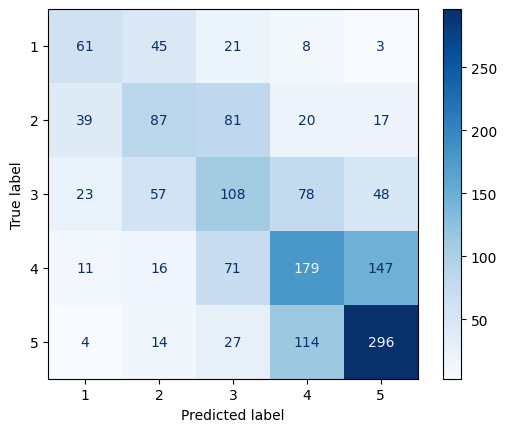

In [203]:

print("Recall: {}".format(recall_score(Y_test, Y_pred_test, average='micro')))
print("Precisión: {}".format(precision_score(Y_test, Y_pred_test, average='micro')))
print("Puntuación F1: {}".format(f1_score(Y_test, Y_pred_test, average='micro')))

cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Se observa como el modelo construido acierta el 46,4% de las veces en etiquetar un comentario en una clase definida correctamente. Igualmente, un 46,4% de veces (también) los datos de una clase efectivamente se clasifican como datos de esta, lo cuál es un buen indicador de la forma en cómo clasifica las reseñas. Igualmente, se debe mencionar que la mayoría de comentarios se concentran al rededor de la clase correcta, por ejemplo, en el caso de la clase 5 (comentarios muy positivos) la mayoría de comentarios se encuentran clasificados entre las clases 4 o 5, lo cuál denota que, aunque o se clasifican como clase 5, se sigue notando la clasificación positiva de los comentarios otorgándoles una clase 4, que significa positivo. por otra parte, se observan que los comentarios muy negativos (Clase 1) se clasifican la mayoría entre clases 1 y 2, algunos en la clase 3, siendo el mayor volumen en la clase, pero se le da una buena notacióin, ya que los comentarios negativos los clasifica efectivamente como comentarios negativos, pero con diferente fuerza, la cual puede llegar a ser subjetiva.

Igualmente, se observa que muy pocos comentarios son clasificados completamente de forma errónea, por ejemplo, los 3 comentarios clasificados como clase 5 (muy positivos) que en verdad eran clase 1 (muy negativos), los cuales se procede a analizar con mayor detaolle a continuación.

A modo de ejemplo se selecciona un comentario clasificado con clase 5 siendo en verdad de clase 1:

In [204]:
falsos_negativos = (Y_test == 1) & (Y_pred_test == 5)

muestra_falso_negativo = X_test[falsos_negativos].sample(1).values[0]
fila_coincidente = token_df.loc[token_df['Text'] == muestra_falso_negativo]
resenia_falso_negativo = fila_coincidente['Review'].values[0]
print(resenia_falso_negativo)

Muy hermoso hotel.mi estancia fue de lo mejor.k lo recomiendo a todo publico..gracias ala amabilidad de su personal..en especial a la srita.ESMERALDA Y A AMANDA.k siempre estuvieron al pendiente k no nos faltara nada.x su atencion gracias ..nos vemos pronto


Es posible ver que este comentario realmente tiene significado positivo pero su clase original es negativa. esto puede ser ocasionado por una mala clasificación de los datos o un error en el proceso de etiquetado en el set de datos como errores humanos al colocar la calificación erronea y enviar el comentario. En este caso, es positivo que el algoritmo clasifique este tipo de comentarios erroneamente para hacer la correccón de la clase a la que debería pertenecer, notando que el algoritmo muestra un buen grado de validez.

De la misma forma se busca observar una reseña de clase 5 (muy positiva) que fue clasificada como clase 1 (muy negativa) de las 4 reseñas etiquetadas de forma completamente erronea:

In [208]:
falsos_positivos = (Y_test == 5) & (Y_pred_test == 1)

muestra_falso_positivo = X_test[falsos_positivos].sample(1).values[0]
fila_coincidente = token_df.loc[token_df['Text'] == muestra_falso_positivo]
resenia_falso_positivo = fila_coincidente['Review'].values[0]
print(resenia_falso_positivo)

excelente lugar,  solo que comentaba que en desayuno incluido te colocan un precio y desayuno adicional te lo cobran al doble. entiendo y sabia del precio, no fue sorpresa pero como sugerencia si cuando tu como huésped invitas a otros o desayunas con otros y el precio lo reducen en estos casos, fomentarías el slogan business class


En este caso se puede observar la connotación positiva del comentario, aun así, frases como 'cobran al doble' o 'precio y desayuno adicional' son negativas. Esto puede hacer que el clasificador pueda tomar las palabras como negativas y otorgarles una calificación equivocada, lo cual se recomienda, en caso de uso del algoritmo que sea revisado por un factor humano que supervise la clasificación de la máquina.

Ahora se analizan los valores de métrica para cada una de las clases habiendo visto ejempos de casos de fallo.

In [211]:
report = classification_report(Y_test, Y_pred_test)
print(report)

              precision    recall  f1-score   support

           1       0.44      0.44      0.44       138
           2       0.40      0.36      0.38       244
           3       0.35      0.34      0.35       314
           4       0.45      0.42      0.43       424
           5       0.58      0.65      0.61       455

    accuracy                           0.46      1575
   macro avg       0.44      0.44      0.44      1575
weighted avg       0.46      0.46      0.46      1575



Para este contexto, se le da mayor valor al recall que la precisión, pues, como se discutió, existen casos en donde una clase cercana es una clasificación aproximadamente correcta pero *precisa*, por lo que se interpreta principalmente este valor para cada una de las clases.

Se observa que los valores más altos están en clases donde el significado de sus reseñas son extremos (clase 1 y 5), donde incluso en la clase 5 más de la mitad de los datos de la clase tienen una clasificación correcta. Igualmente se observa que a pesar que estén los resultados por debajo de la mitad del porcentaje de recall, un detalle a tener en cuenta son los datos de clases cercanas, que, si bien no se le está etiquetando en su clase correspondiente, se le está dando una notación positiva o negativa similar a la clase verdadera, haciendo un trabajo correcto.

En este contexto, se puede observar que la clase con las menores métricas de presición y recall (por lo tanto f1 también) es la clase 3, que, al ser neutra, es fácil de mal clasificar, sin emargo, eln la matriz de confusión, se obserav como la mayoría de los valores de concentran en la clase correcta y se dispersan a medida que la clase deja de corresponder. A pesar de tener el mayor número de valores mal clasificados respecto a las otras clases, se justifica al tener en cuenta que los comentarios neutros carecen de sesgo para clasificarlos de una manera correcta, como se muestra en el siguiente ejemplo:

In [ ]:
falsos_neg_3s = (Y_test == 3) & (Y_pred_test == 1)
falsos_pos_3s = (Y_test == 3) & (Y_pred_test == 5)

muestra_falso_neg_3 = X_test[falsos_neg_3s].sample(1).values[0]
muestra_falso_pos_3 = X_test[falsos_pos_3s].sample(1).values[0]
fila_coincidente_neg = token_df.loc[token_df['Text'] == muestra_falso_neg_3]
fila_coincidente_pos = token_df.loc[token_df['Text'] == muestra_falso_pos_3]
resenia_falso_neg_3 = fila_coincidente_neg['Review'].values[0]
resenia_falso_pos_3 = fila_coincidente_pos['Review'].values[0]
print(">> Clase 1 siendo 3:",resenia_falso_neg_3)
print(">> Clase 5 siendo 3:",resenia_falso_pos_3)

#### Modelado con 'SVC' (David Leon)

In [206]:
model = SVC()

vectorizer, model = best_vectorizer(model)

>> El mejor vectorizador es TfidfVectorizer() con un score f1 de 0.4658730158730159


#### Validación cuantitativa con 'SVC' (David Leon)

#### Modelado con 'Naive-Bayes multinomial' (Natalia Ortega)

In [207]:
model = MultinomialNB()

vectorizer, model = best_vectorizer(model)

(!) No se pudo realizar word2vec por el motivo mostrado
>> El mejor vectorizador es CountVectorizer() con un score f1 de 0.44761904761904764


#### Validación cuantitativa con 'Naive-Bayes multinomial' (Natalia Ortega)